In [1]:
import sys
import os
import pandas as pd
from pprint import pprint

# Import your custom modules. Adjust the module paths as needed.
from data.load_data import loadTrainingData
from plots.feature_plots import plot_missingness


In [2]:
# Define directories and max_files manually.
directories = ['../../training_setA/', '../../training_setB/']
max_files = None  # Change this to a number (e.g., 1000) if you want to limit the number of files

dfs = []
for directory in directories:
    # Build the path pattern for .psv files in the directory.
    pattern = os.path.join(directory, "*.psv")
    print(f"\nLoading data from: {pattern} with max_files={max_files}")
    patient_data = loadTrainingData(pattern, max_files)
    
    # Concatenate all DataFrames from the current directory.
    combined_df = pd.concat(list(patient_data.values()), ignore_index=True)
    dfs.append(combined_df)

# Concatenate the combined DataFrames from all directories.
all_data = pd.concat(dfs, ignore_index=True)
print(f"\nCombined training set shape: {all_data.shape}")



Loading data from: ../../training_setA/*.psv with max_files=None


Loading PSV Files: 100%|█████████████████| 20336/20336 [00:22<00:00, 912.19it/s]



Loading data from: ../../training_setB/*.psv with max_files=None


Loading PSV Files: 100%|█████████████████| 20000/20000 [00:20<00:00, 970.06it/s]



Combined training set shape: (1552210, 35)


Average missingness: 77.84%


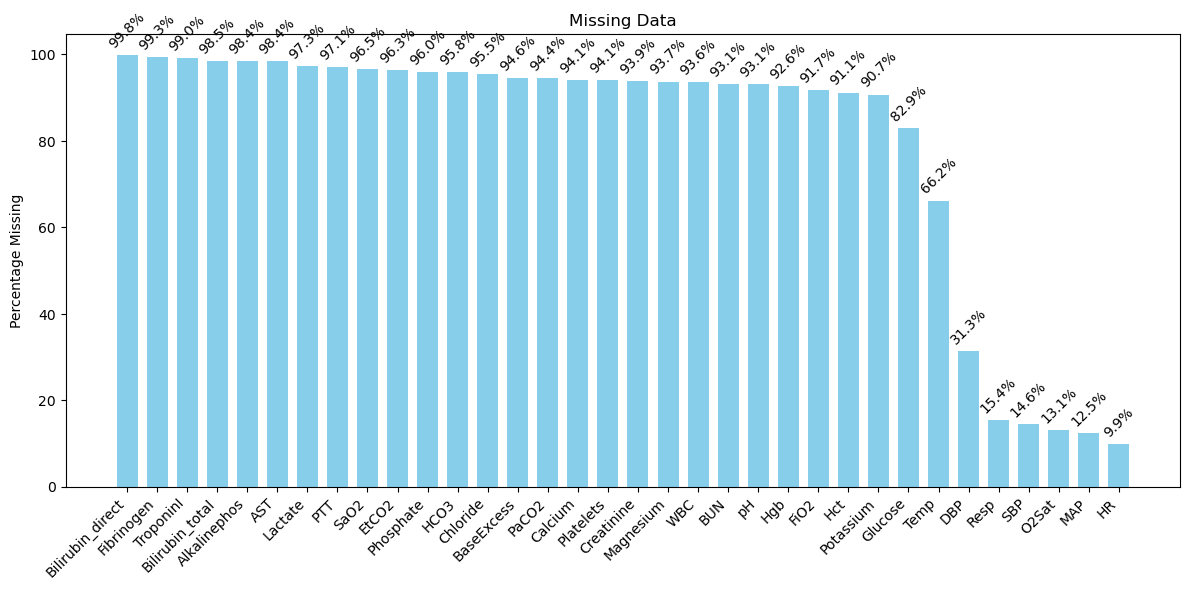

In [3]:
plot_missingness(all_data, title=f"Missing Data")

In [4]:
all_data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'SepsisLabel'],
      dtype='object')

In [5]:
# Improve Missingness here